In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
import warnings
warnings.filterwarnings("ignore")

# **Read Data**

In [47]:
os.listdir("/kaggle/input/")
df = pd.read_csv("../input/amldata/processedFraud.csv")

# **Exploratory Data Analysis**

In [15]:
df

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,7,PAYMENT,11396.93,C512428725,0.00,0.00,M2129874611,0.00,0.00,0,0
1,1,1,PAYMENT,1461.06,C641030345,226.00,0.00,M521466380,0.00,0.00,0,0
2,2,6,TRANSFER,18554.73,C248447628,1018.00,0.00,C1955948959,0.00,18554.73,0,0
3,3,702,CASH_OUT,573266.42,C1802792293,573266.42,0.00,C203516640,0.00,573266.42,1,0
4,4,413,CASH_OUT,781.93,C823598101,781.93,0.00,C1338255129,0.00,781.93,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1,PAYMENT,8948.03,C788905599,11137.00,2188.97,M1678709153,0.00,0.00,0,0
19996,19996,36,CASH_OUT,819503.92,C510717698,819503.92,0.00,C1469248112,255585.23,1470226.48,1,0
19997,19997,6,TRANSFER,85354.69,C558400671,85354.69,0.00,C527482085,0.00,0.00,1,0
19998,19998,383,TRANSFER,106601.15,C1575202335,106601.15,0.00,C278215975,0.00,0.00,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20000 non-null  int64  
 1   step            20000 non-null  int64  
 2   type            20000 non-null  object 
 3   amount          20000 non-null  float64
 4   nameOrig        20000 non-null  object 
 5   oldbalanceOrg   20000 non-null  float64
 6   newbalanceOrig  20000 non-null  float64
 7   nameDest        20000 non-null  object 
 8   oldbalanceDest  20000 non-null  float64
 9   newbalanceDest  20000 non-null  float64
 10  isFraud         20000 non-null  int64  
 11  isFlaggedFraud  20000 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 1.8+ MB


In [17]:
#Descriptive stats
df.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,20000.000000,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,154.014850,6.640608e+05,1.160773e+06,5.752505e+05,7.414484e+05,1.183187e+06,0.410650,0.000800
std,5773.647028,226.409487,1.689986e+06,2.799618e+06,2.077058e+06,2.928435e+06,3.453401e+06,0.491964,0.028274
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4999.750000,5.000000,8.328507e+03,1.026825e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,9999.500000,7.000000,8.721911e+04,9.339950e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,14999.250000,283.000000,3.990672e+05,8.068633e+05,2.384486e+04,2.110510e+05,6.057667e+05,1.000000,0.000000
max,19999.000000,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000,1.000000


In [18]:
df.corr()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
Unnamed: 0,1.000000,-0.006249,-0.009464,-0.004948,0.000168,0.004850,-0.000617,-0.011997,-0.007284
step,-0.006249,1.000000,0.340895,0.146410,-0.100326,-0.036039,0.030994,0.790475,0.047935
amount,-0.009464,0.340895,1.000000,0.698877,0.133697,0.003907,0.244926,0.397084,0.070282
oldbalanceOrg,-0.004948,0.146410,0.698877,1.000000,0.796172,0.067506,0.179667,0.145773,0.067285
newbalanceOrig,0.000168,-0.100326,0.133697,0.796172,1.000000,0.120475,0.076752,-0.153868,0.098668
oldbalanceDest,0.004850,-0.036039,0.003907,0.067506,0.120475,1.000000,0.896061,-0.056212,-0.007164
newbalanceDest,-0.000617,0.030994,0.244926,0.179667,0.076752,0.896061,1.000000,0.023331,-0.009695
isFraud,-0.011997,0.790475,0.397084,0.145773,-0.153868,-0.056212,0.023331,1.000000,0.033898
isFlaggedFraud,-0.007284,0.047935,0.070282,0.067285,0.098668,-0.007164,-0.009695,0.033898,1.000000


In [19]:
df_analysis=pd.pivot_table(df,index=["type"], values=['amount','isFraud','isFlaggedFraud'],aggfunc=[np.sum,np.std], margins=True)
print(df_analysis)

                   sum                                  std                 \
                amount isFlaggedFraud isFraud        amount isFlaggedFraud   
type                                                                         
CASH_IN   3.559579e+08              0       0  1.386172e+05       0.000000   
CASH_OUT  6.247654e+09              0    4116  2.120810e+06       0.000000   
DEBIT     1.296450e+06              0       0  2.650776e+03       0.000000   
PAYMENT   5.228096e+07              0       0  7.423237e+03       0.000000   
TRANSFER  6.624027e+09             16    4097  2.191340e+06       0.055279   
All       1.328122e+10             16    8213  1.689944e+06       0.028273   

                    
           isFraud  
type                
CASH_IN   0.000000  
CASH_OUT  0.445761  
DEBIT     0.000000  
PAYMENT   0.000000  
TRANSFER  0.411059  
All       0.491952  


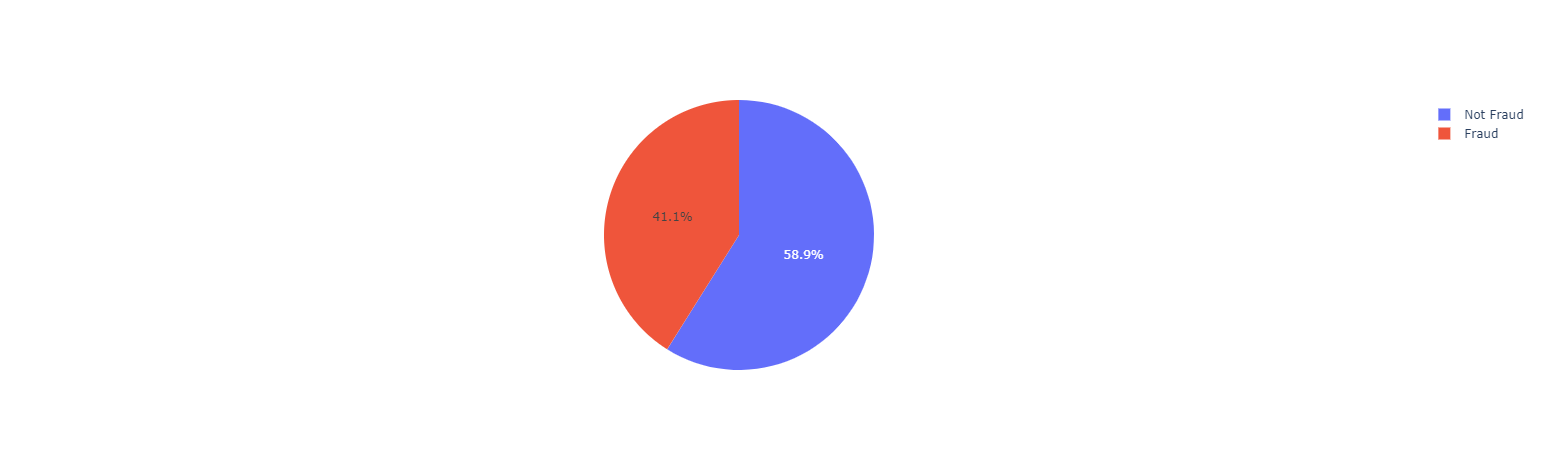

In [20]:
#Check if data is balanced
pie_chart = go.Figure(data=[go.Pie(labels=['Not Fraud','Fraud'], values=df['isFraud'].value_counts())])
pie_chart.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20000 non-null  int64  
 1   step            20000 non-null  int64  
 2   type            20000 non-null  object 
 3   amount          20000 non-null  float64
 4   nameOrig        20000 non-null  object 
 5   oldbalanceOrg   20000 non-null  float64
 6   newbalanceOrig  20000 non-null  float64
 7   nameDest        20000 non-null  object 
 8   oldbalanceDest  20000 non-null  float64
 9   newbalanceDest  20000 non-null  float64
 10  isFraud         20000 non-null  int64  
 11  isFlaggedFraud  20000 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 1.8+ MB


# **Preprocessing & Feature Engineering**

In [22]:
!pip3 install sdv

In [12]:
from ctgan import CTGANSynthesizer
from sdv.tabular import CTGAN
from ctgan import CTGANSynthesizer

# Identifies all the discrete columns

discrete_columns = ['step', 'type', 'amount', 'nameOrig',
       'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

# Initiates the CTGANSynthesizer and call its fit method to pass in the table
 
ctgan = CTGANSynthesizer(epochs=10)
ctgan.fit(df, discrete_columns)

#generate synthetic data, 1000 rows of data

synthetic_data = ctgan.sample(2)
synthetic_data

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [24]:
from sdv.tabular import GaussianCopula


model = GaussianCopula()

#model = CTGAN(primary_key='index', epochs=700, batch_size=200, generator_dim=(256, 256, 256), discriminator_dim=(256, 256, 256))
model.fit(df)
#model.save("sdv-ctgan-retail.pkl")
new_data = model.sample(300000)
new_data

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,4892,384,CASH_OUT,438508.0,C779598031,2543547.0,1927770.0,C2069990042,220123.0,1201524.0,1,0
1,6446,101,TRANSFER,439631.0,C1573553725,451183.0,717395.0,C18819667,1863152.0,2506392.0,0,0
2,2710,231,TRANSFER,1442731.0,C845388562,4874294.0,2515522.0,C894315519,3923735.0,4943440.0,0,0
3,15776,171,CASH_OUT,6975.0,C1431556341,52111.0,2217442.0,C746009679,2427089.0,3066179.0,0,0
4,11037,358,DEBIT,1774158.0,C1115073856,3769309.0,1437459.0,C454462706,3048279.0,5279083.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,15436,152,CASH_OUT,1089588.0,C1538555812,2090211.0,1179094.0,C117985558,401642.0,538805.0,0,0
299996,7145,283,CASH_OUT,1129842.0,C362452126,2498198.0,1008705.0,C875288652,1872046.0,1311325.0,1,0
299997,16951,232,CASH_OUT,559316.0,C1234748794,568777.0,372581.0,M1440183980,345154.0,216654.0,0,0
299998,13392,64,PAYMENT,261386.0,C96213251,303795.0,605819.0,M721975085,1785074.0,1818620.0,0,0


In [51]:
df

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,7,PAYMENT,11396.93,C512428725,0.00,0.00,M2129874611,0.00,0.00,0,0
1,1,1,PAYMENT,1461.06,C641030345,226.00,0.00,M521466380,0.00,0.00,0,0
2,2,6,TRANSFER,18554.73,C248447628,1018.00,0.00,C1955948959,0.00,18554.73,0,0
3,3,702,CASH_OUT,573266.42,C1802792293,573266.42,0.00,C203516640,0.00,573266.42,1,0
4,4,413,CASH_OUT,781.93,C823598101,781.93,0.00,C1338255129,0.00,781.93,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,1,PAYMENT,8948.03,C788905599,11137.00,2188.97,M1678709153,0.00,0.00,0,0
19996,19996,36,CASH_OUT,819503.92,C510717698,819503.92,0.00,C1469248112,255585.23,1470226.48,1,0
19997,19997,6,TRANSFER,85354.69,C558400671,85354.69,0.00,C527482085,0.00,0.00,1,0
19998,19998,383,TRANSFER,106601.15,C1575202335,106601.15,0.00,C278215975,0.00,0.00,1,0


In [50]:
from sdv.evaluation import evaluate
#new_data = new_data.drop('index', axis = 1)
evaluate(new_data, df, aggregate = False)

,metric,name,raw_score,normalized_score,min_value,max_value,goal,error
0,KSComplement,Inverted Kolmogorov-Smirnov D statistic,0.567854,0.567854,0.0,1.0,MAXIMIZE,None
1,CSTest,Chi-Squared,1.000000,1.000000,0.0,1.0,MAXIMIZE,None


In [26]:
df = new_data.copy()

In [15]:
#Create Functions for feature engineering
#We need to check the changes in sender's and receiver's balance, and flag when inconsistent (will do)
#We need to check if the amount debited from the sender, went into receiver's account, and flag if not correct
#We have to set a threshold in transaction amount and flag if it goes over it.
#We can create feature that says if the receiving account belongs to a merchant

def flag(df):
    df['actual_newbalanceDest'] = df['oldbalanceDest']+df['amount']  
    for i,rows in df.iterrows():
        if df.iloc[i]['actual_newbalanceDest'] == df.iloc[i]['newbalanceDest']:
            df['balanceDest_flag'] = 0
        else:
            df['balanceDest_flag'] = 1

# def true_balance(df):
#     df['diff_sender'] = df['oldbalanceOrg']-df['newbalanceOrig']
#     df['diff_sender'] = df['diff_sender'].astype(int)
#     for i in df['diff_sender']:
#         if df['diff_sender']-df  
    
#     df['diff_receiver'] = df['oldbalanceDest']-df['newbalanceDest']
            
def thresh_flag(df):
    for i in df['amount']:
        if i>200000:
            df['threshold_flag'] = 1
        else:
            df['threshold_flag'] = 0
            
def detect_M(df):
    x = ['M']
    x2 = list(map(df['nameDest'].str.contains, x))
    df['Merchant'] = np.select(x2, '1', '0')
    
#Function for efficient memory use
def reduce_memory(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                       df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
#Memory reduction in df and feature engineering
reduce_memory(df)
flag(df)
thresh_flag(df)
detect_M(df)

In [ ]:
# #Fucntion to calculate Information value with WoE - weight of evidence (not ready)

# def information_value(df, feature, target, pr=0):

#     lst = []

#     for i in range(df[feature].nunique()):
#         val = list(df[feature].unique())[i]
#         lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

#     data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
#     data = data[data['Bad'] > 0]

#     data['Share'] = data['All'] / data['All'].sum()
#     data['Bad Rate'] = data['Bad'] / data['All']
#     data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
#     data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
#     data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
#     data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

#     data = data.sort_values(by=['Variable', 'Value'], ascending=True)

#     if pr == 1:
#         print(data)

#     return data['IV'].values[0]

In [27]:
#Encoding the rest of the object type features
#One-hot encoding for type which has 4 differnet values
#Label encoding for nameOrig and nameDest to avoid curse of dimensionality(if we use one hot encoding here, there will be too many dims)
from sklearn import preprocessing

df = pd.get_dummies(data = df, columns=['type'])
lenc = preprocessing.LabelEncoder()
df['nameOrig'] = lenc.fit_transform(df['nameOrig'])
df['nameDest'] = lenc.fit_transform(df['nameDest'])
#df['Merchant'] = df['Merchant'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      300000 non-null  int64  
 1   step            300000 non-null  int64  
 2   amount          300000 non-null  float64
 3   nameOrig        300000 non-null  int64  
 4   oldbalanceOrg   300000 non-null  float64
 5   newbalanceOrig  300000 non-null  float64
 6   nameDest        300000 non-null  int64  
 7   oldbalanceDest  300000 non-null  float64
 8   newbalanceDest  300000 non-null  float64
 9   isFraud         300000 non-null  int64  
 10  isFlaggedFraud  300000 non-null  int64  
 11  type_CASH_IN    300000 non-null  uint8  
 12  type_CASH_OUT   300000 non-null  uint8  
 13  type_DEBIT      300000 non-null  uint8  
 14  type_PAYMENT    300000 non-null  uint8  
 15  type_TRANSFER   300000 non-null  uint8  
dtypes: float64(5), int64(6), uint8(5)
memory usage: 26.6 MB


In [28]:
df = df.drop('Unnamed: 0', axis = 1)

# **Preparing independent and dependent variables**

In [29]:
#Define dependent and independent variables
df3 = df.copy()
y = df3['isFraud']
X = df3.drop('isFraud', axis = 1)

In [30]:
print(X.shape)
print(y.shape)

(300000, 14)
(300000,)


In [31]:
#Create X_train and y_train dfs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [42]:
y_test

9543     0
19757    0
2706     1
16103    0
14873    0
        ..
14752    0
1521     0
14674    0
12487    1
16237    1
Name: isFraud, Length: 6000, dtype: int64

# **Over-sampling the training data with SMOTE - Synthetic Minority Oversampling Technique**

In [ ]:
#Oversampling data with SMOTE because there are very few cases of Fraud
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X, y)

# **Modeling**

In [32]:
#fit the model
import lightgbm 

lgb = lightgbm.LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier()

In [33]:
y_pred=lgb.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy: 0.8688


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[37405  4705]
 [ 5132 27758]]

True Positives(TP) =  37405

True Negatives(TN) =  27758

False Positives(FP) =  4705

False Negatives(FN) =  5132


<AxesSubplot:>

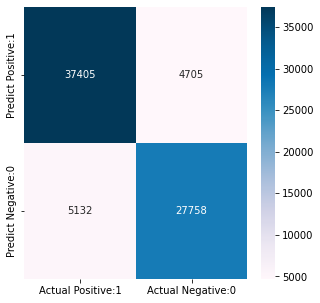

In [36]:
confusion_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap = 'PuBu', ax = ax)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     42110
           1       0.86      0.84      0.85     32890

    accuracy                           0.87     75000
   macro avg       0.87      0.87      0.87     75000
weighted avg       0.87      0.87      0.87     75000



In [38]:
#F1_macro is a better indicator of the model performance, since it is the harmonic mean between precision and sensitivity
#Accuracy is not a good indicator in cases of target feature label imbalance
from sklearn.metrics import f1_score, accuracy_score
print('Accuracy:', round(accuracy_score(y_test, y_pred),3))
print('F1_macro:',round(f1_score(y_test, y_pred, average='macro'),2))

Accuracy: 0.869
F1_macro: 0.87


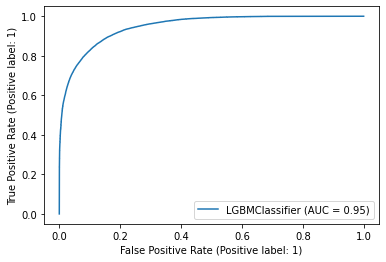

In [39]:
import scikitplot as skplt

metrics.plot_roc_curve(lgb, X_test, y_test)
plt.show()

# **Model Interpretability**

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

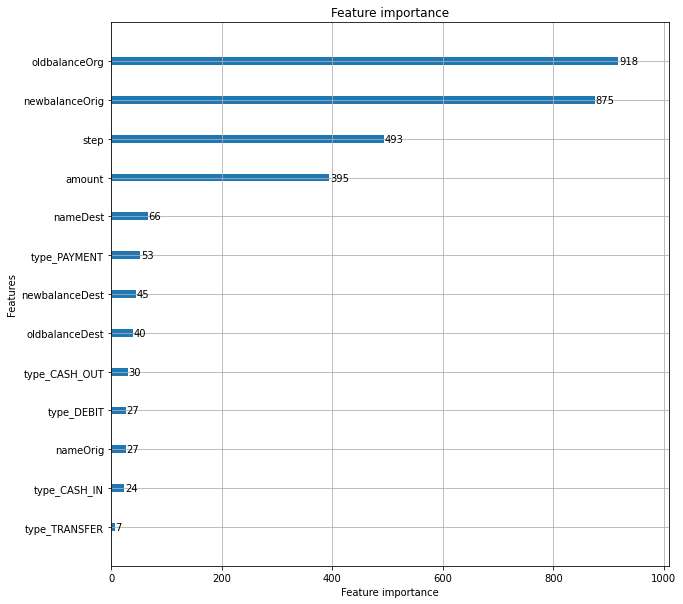

In [40]:
plt.rcParams["figure.figsize"] = (10, 10)

lightgbm.plot_importance(lgb)

In [41]:
#Looking at model weights to explain predictions
import eli5
eli5.show_weights(lgb)

Weight,Feature
0.7113,step
0.1173,oldbalanceOrg
0.1117,newbalanceOrig
0.0413,amount
0.0084,type_PAYMENT
0.0026,type_CASH_OUT
0.0024,type_CASH_IN
0.0013,nameDest
0.0012,type_DEBIT
0.0009,newbalanceDest


# **Explainable AI**

In [42]:
import shap
explainer = shap.TreeExplainer(lgb, feature_perturbation="interventional", model_output="raw")
shap_values = explainer.shap_values(X_train)
expected_value = explainer.expected_value

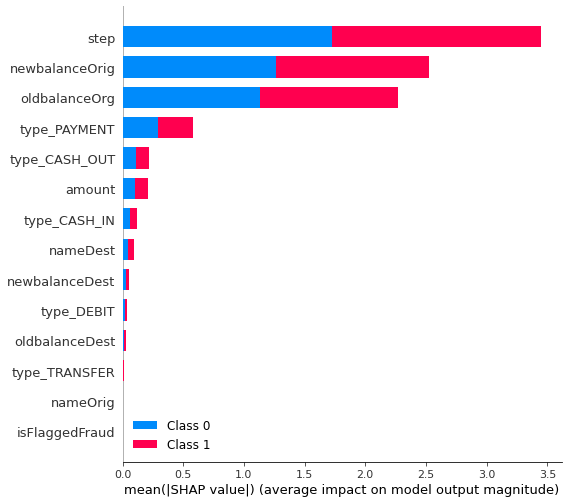

In [43]:
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

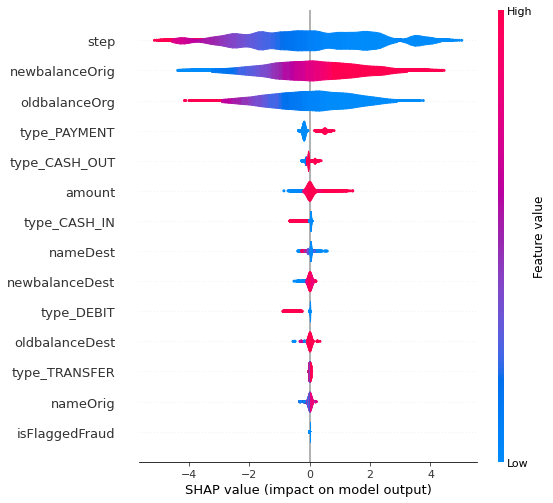

In [44]:
shap.summary_plot(shap_values[0], X_train, plot_type = 'violin') 

In [ ]:
#shap.force_plot(explainer.expected_value[0], shap_values[0], X_train)